In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import os
import skimage
import numpy as np
from tqdm import tqdm
import cv2
from glob import glob
from skimage import io
import warnings
import random
warnings.filterwarnings('ignore')

%matplotlib inline

# Helpers

def create_directory(directory):
    '''
    Creates a new folder in the specified directory if the folder doesn't exist.
    INPUT
        directory: Folder to be created, called as "folder/".
    OUTPUT
        New folder in the current directory.
    '''
    if not os.path.exists(directory):
        os.makedirs(directory)

        
        
def read_nuclei(path):
    "Read raw data"

    # Load 4-channel image
    if len(path) == 0:
        return None
    
    img = skimage.io.imread(path)
    
    # input image
    if len(img.shape) > 2:
        img = img[:,:,:3]
    # mask
    else:
        # do nothing
        pass
        
    return img

        
        
def save_nuclei(path, img):
    "save image"
    skimage.io.imsave(path, img)
    
# MoNuSAC    
# label_map = {'Epithelial':1,
#              'Lymphocyte':2,
#              'Macrophage':4,
#              'Neutrophil':3,
#             }


In [2]:
import os, gc
gc.collect()

work_directory_R = os.getcwd() + "/January_WRadiomics\ResultsPredicted"

print('\n\nSelect Organ')
option_Org = int(input("\n 1-Breast \n 2-Kidney \n 3-Lung \n 4-Prostate \n 5-All \n"))
while option_Org  not in (1,2,3,4,5):
    option_Org = int(input("\n 1-Breast \n 2-Kidney \n 3-Lung \n 4-Prostate \n 5-All \n"))

print('\nSelect Category Types')
option_CTT = int(input("\n 1-Epithelial \n 2-Lymphocyte \n 3-Macrophage \n 4-Neutrophil \n 5-All \n"))
while option_CTT  not in (1,2,3,4,5):
    option_CTT = int(input("\n 1-Epithelial \n 2-Lymphocyte \n 3-Macrophage \n 4-Neutrophil \n 5-All \n"))

    
if option_Org==1:
    Feature_Type = "Classify_E_Breast"

elif option_Org==2:
    Feature_Type = "Classify_E_Kidney"

elif option_Org==3:
    Feature_Type = "Classify_E_Lung"

elif option_Org==4:
    Feature_Type = "Classify_E_Prostate"

elif option_Org==5:
    Feature_Type = "Classify_E_All"
    
    
print("\n\nOrgan Type:", Feature_Type)

IMAGES_FOLDER_Main = os.path.join(work_directory_R, Feature_Type)
MASKS_FOLDER_Main = os.path.join(work_directory_R, Feature_Type)

if option_CTT==1:  
    gt_T = "Epithelial"
    Name_Nuclei = "Epithelial"
    Name_Nuclei_Mask = "Epithelial_Mask"
elif option_CTT==2:
    gt_T = "Lymphocyte"
    Name_Nuclei = "Lymphocyte"
    Name_Nuclei_Mask = "Lymphocyte_Mask"
elif option_CTT==3:
    gt_T = "Macrophage"
    Name_Nuclei = "Macrophage"
    Name_Nuclei_Mask = "Macrophage_Mask"
elif option_CTT==4:
    gt_T = "Neutrophil"
    Name_Nuclei = "Neutrophil"
    Name_Nuclei_Mask = "Neutrophil_Mask"
    
    
if option_CTT==1 or option_CTT==2 or option_CTT==3 or option_CTT==4:
    print("Nuclei:", Name_Nuclei)
    print("Mask:", Name_Nuclei_Mask)

    IMAGES_FOLDER, MASKS_FOLDER = 0, 0
    IMAGES_FOLDER = os.path.join(work_directory_R, Feature_Type, Name_Nuclei)
    MASKS_FOLDER = os.path.join(work_directory_R, Feature_Type, Name_Nuclei_Mask)

    print('---'*35)
    print('Main Folders')

    print(IMAGES_FOLDER)
    print("\n",MASKS_FOLDER)

    print('---'*35)





Select Organ

 1-Breast 
 2-Kidney 
 3-Lung 
 4-Prostate 
 5-All 
5

Select Category Types

 1-Epithelial 
 2-Lymphocyte 
 3-Macrophage 
 4-Neutrophil 
 5-All 
3


Organ Type: Classify_E_All
Nuclei: Macrophage
Mask: Macrophage_Mask
---------------------------------------------------------------------------------------------------------
Main Folders
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics\ResultsPredicted\Classify_E_All\Macrophage

 D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics\ResultsPredicted\Classify_E_All\Macrophage_Mask
---------------------------------------------------------------------------------------------------------


In [4]:
print('---'*35)
print('Images Folder')

if option_CTT==1 or option_CTT==2 or option_CTT==3 or option_CTT==4 or option_CTT==5:
    IMAGES_SUB_FOLDER = [os.path.join(IMAGES_FOLDER, i) for i in sorted(next(os.walk(IMAGES_FOLDER))[-1])]
    
print(IMAGES_SUB_FOLDER[:5])
print("Total Images: ", len(IMAGES_SUB_FOLDER[:]))

print('\n')
print('---'*35)
print('Masks Folder')

if option_CTT==1 or option_CTT==2 or option_CTT==3 or option_CTT==4 or option_CTT==5:
    MASKS_SUB_FOLDER = [os.path.join(MASKS_FOLDER, i) for i in sorted(next(os.walk(MASKS_FOLDER))[-1])]
    
print(MASKS_SUB_FOLDER[:5])
print("Total Masks: ", len(MASKS_SUB_FOLDER[:]))

print('---'*35)


---------------------------------------------------------------------------------------------------------
Images Folder
['D:\\Research Work\\Paper - 4\\BreastLiverNet\\MoNuSAC\\My_Code 19-05-2022 Professor Idea\\Final Code\\Decemeber_22/January_WRadiomics\\ResultsPredicted\\Classify_E_All\\Macrophage\\Type_L-_0.jpg', 'D:\\Research Work\\Paper - 4\\BreastLiverNet\\MoNuSAC\\My_Code 19-05-2022 Professor Idea\\Final Code\\Decemeber_22/January_WRadiomics\\ResultsPredicted\\Classify_E_All\\Macrophage\\Type_L-_1.jpg', 'D:\\Research Work\\Paper - 4\\BreastLiverNet\\MoNuSAC\\My_Code 19-05-2022 Professor Idea\\Final Code\\Decemeber_22/January_WRadiomics\\ResultsPredicted\\Classify_E_All\\Macrophage\\Type_M-_10.jpg', 'D:\\Research Work\\Paper - 4\\BreastLiverNet\\MoNuSAC\\My_Code 19-05-2022 Professor Idea\\Final Code\\Decemeber_22/January_WRadiomics\\ResultsPredicted\\Classify_E_All\\Macrophage\\Type_M-_100.jpg', 'D:\\Research Work\\Paper - 4\\BreastLiverNet\\MoNuSAC\\My_Code 19-05-2022 Professor

In [5]:
if option_CTT==1 or option_CTT==2 or option_CTT==3 or option_CTT==4:
    a = sorted(next(os.walk(IMAGES_FOLDER))[-1])
    b = sorted(next(os.walk(MASKS_FOLDER))[-1])
    print(a[:2], b[:2])

    for x,y in zip(a,b):
        if x == y:
            print(True)
        else:
            print(False)

['Type_L-_0.jpg', 'Type_L-_1.jpg'] ['Type_L-_0.jpg', 'Type_L-_1.jpg']
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [6]:
ct = 2
print(IMAGES_SUB_FOLDER[ct])
print(MASKS_SUB_FOLDER[ct])

D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics\ResultsPredicted\Classify_E_All\Macrophage\Type_M-_10.jpg
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics\ResultsPredicted\Classify_E_All\Macrophage_Mask\Type_M-_10.jpg


### Process raw data to initial version

In [7]:
### MAIN#########

images = []
masks = []

iterator = 0

raw_ct = 0
gt_ct = 0
for ct in tqdm(range(len(IMAGES_SUB_FOLDER[:]))):
    # Read all raw images in image sub folder
    all_imgs = sorted(glob(IMAGES_SUB_FOLDER[ct]))
    
    # Read the mask sub folders
    all_mask_sub_dir = sorted(glob(MASKS_SUB_FOLDER[ct]))

    # Iterate over the individual raw images
    for i in range(len(all_imgs)):
        # .............
        # Read it
        # .............
        img = read_nuclei(all_imgs[i])

        # .............
        # Save it
        # .............
        raw_ct+=1
        images.append(img)

    # Iterate over the individual mask sub folders
    for j in range(len(all_mask_sub_dir)):
        try:
            mask = read_nuclei(all_mask_sub_dir[j])
        except ValueError:  #raised if `y` is empty.
            pass            
            
        # Save it
        # .............
        mask = mask.astype(np.uint8)
        gt_ct+=1
        iterator+=1
        masks.append(mask)
        
print(len(images), len(masks))

100%|█████████████████████████████████████████████████████████████████████████████| 1348/1348 [00:04<00:00, 303.08it/s]

1348 1348


In [8]:
Images_ = np.asarray(images) 
Masks_ = np.asarray(masks)  

print('\nX_train shape:', Images_.shape)
print('Y_train shape:', Masks_.shape)


X_train shape: (1348, 128, 128, 3)
Y_train shape: (1348, 128, 128)


### Sanity Check

In [9]:
def Morphological(img, close=0, open_=0):
    # Morphological closing
    if close > 0:
        kernel = np.ones((close, close), np.uint8)
        img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)                 

    if open_ > 0:
        kernel = np.ones((open_, open_), np.uint8)
        img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)                 
        
    return img

def imageThresholding(img, sthresh=20, kernel=5, sthresh_up=255, close=0, open_=0, globalT=False ,otsu=False, otsu_gaussian=False, morphological=False):
    
    if globalT:
        # global thresholding
        ret1,th1 = cv2.threshold(img, sthresh , sthresh_up ,cv2.THRESH_BINARY)
        if morphological:
            th1 = Morphological(th1, close, open_)
            
    if otsu:
        # Otsu's thresholding
        ret2,th2 = cv2.threshold(img, 0, sthresh_up , cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        if morphological:
            th2 = Morphological(th2, close, open_)
            
    if otsu_gaussian:
        # Otsu's thresholding after Gaussian filtering
        blur = cv2.GaussianBlur(img, (kernel,kernel) ,0)
        ret3,th3 = cv2.threshold(blur, 0, sthresh_up, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

        if morphological:
            Morphological(th3, close, open_)
            th3 = Morphological(th3, close, open_)

    return th1, th2, th3
    


Index:  998
Type_M-_684.jpg
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics\ResultsPredicted\Classify_E_All\Macrophage\Type_M-_684.jpg
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics\ResultsPredicted\Classify_E_All\Macrophage_Mask\Type_M-_684.jpg
(128, 128, 3) (128, 128)
Ground truth classes:  [0 1]


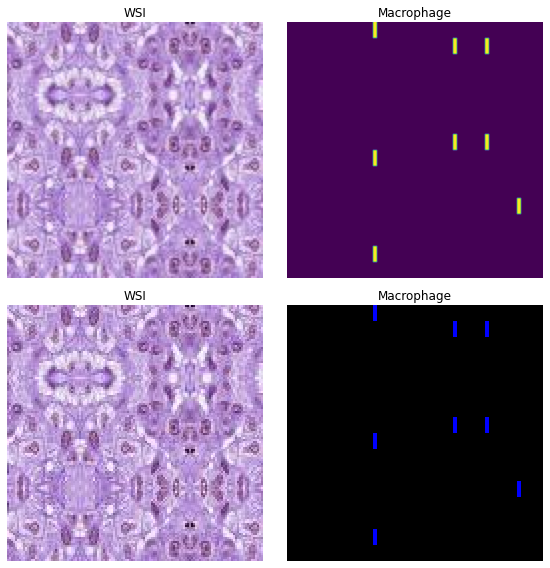

In [10]:
if option_CTT==1 or option_CTT==2 or option_CTT==3 or option_CTT==4:
    image_fns = sorted(next(os.walk(IMAGES_FOLDER))[2])
    gt_fns = sorted(next(os.walk(MASKS_FOLDER))[2])
    
    # Random index
    # idx = 100 #random.randrange(len(image_fns))
    idx = random.randrange(len(image_fns))
    print("\nIndex: ", idx)
    print(image_fns[idx])
    print(os.path.join(IMAGES_FOLDER, image_fns[idx]))
    print(os.path.join(MASKS_FOLDER, gt_fns[idx]))

    # Read image and mask
    image = skimage.io.imread(os.path.join(IMAGES_FOLDER, image_fns[idx]))
    gt = skimage.io.imread(os.path.join(MASKS_FOLDER, gt_fns[idx]))
    
    
elif option_CTT==5:
    idx = random.randrange(len(IMAGES_SUB_FOLDER[:]))
    print("\nIndex: ", idx)
    
    # Read image and mask
    image = skimage.io.imread(os.path.join(IMAGES_SUB_FOLDER[idx]))
    gt = skimage.io.imread(os.path.join(MASKS_SUB_FOLDER[idx]))


# Testing Dimensions
assert image.shape[:2] == gt.shape, "Wrong image or ground truth!"
assert image.dtype == gt.dtype, "Wrong data types!"
print(image.shape, gt.shape)

# Flatten to get unique -> different classes in the mask
val1 = gt.flatten()
print("Ground truth classes: ", np.unique(val1))

temp = np.unique(val1)

def process(image, mask, option_P, map_name, norm):
    f, axarr = plt.subplots(1,2, figsize=(10,10))

    if option_P==1:
        axarr[0].imshow(image)
        axarr[1].imshow(mask)
        
    elif option_P==2:
        axarr[0].imshow(image, cmap=map_name, norm=norm)
        axarr[1].imshow(mask, cmap=map_name, norm=norm)
    
    
def process_(image, gt, gt_T, map_name, norm):

    if image is not None and gt is not None:
        fig, axs = plt.subplots(2, 2, figsize=(8,8))
        axs[0,0].imshow(image)
        axs[0,0].set_title("WSI")
        axs[0,0].axis('off')

        axs[0,1].imshow(gt)
        axs[0,1].set_title(gt_T)
        axs[0,1].axis('off')

        axs[1,0].imshow(image)
        axs[1,0].set_title("WSI")
        axs[1,0].axis('off')
        
        axs[1,1].imshow(gt, cmap=map_name, norm=norm)
        axs[1,1].set_title(gt_T)
        axs[1,1].axis('off')
        
        plt.tight_layout()
        plt.show()    

        
if option_CTT==1 or option_CTT==2 or option_CTT==3 or option_CTT==4:
    norm=plt.Normalize(0,1) # 5 classes including BG
elif option_CTT==5:
    norm=plt.Normalize(0,5) # 5 classes including BG

if option_CTT==1:
    map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "red"])

elif option_CTT==2:
    map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "yellow"])

elif option_CTT==3:
    map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "blue"])

elif option_CTT==4:
    map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "green"])

elif option_CTT==5:
    map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "red", "yellow", "blue", "green"])
    
    if IMAGES_SUB_FOLDER[idx].split('_')[4]=="E-":
        gt_T = "Epithelial"
        print(IMAGES_SUB_FOLDER[idx].split('_')[4])
        map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "red"])

    elif IMAGES_SUB_FOLDER[idx].split('_')[4]=="L-":
        gt_T = "Lymphocyte"
        print(IMAGES_SUB_FOLDER[idx].split('_')[4])
        map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "yellow"])

    elif IMAGES_SUB_FOLDER[idx].split('_')[4]=="M-":
        gt_T = "Macrophage"
        print(IMAGES_SUB_FOLDER[idx].split('_')[4])
        map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "blue"])

    elif IMAGES_SUB_FOLDER[idx].split('_')[4]=="N-":
        gt_T = "Neutrophil"
        print(IMAGES_SUB_FOLDER[idx].split('_')[4])
        map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "green"])

process_(image, gt, gt_T, map_name, norm)


Index:  0
Type_L-_0.jpg
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics\ResultsPredicted\Classify_E_All\Macrophage\Type_L-_0.jpg
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics\ResultsPredicted\Classify_E_All\Macrophage_Mask\Type_L-_0.jpg
(128, 128, 3) (128, 128)


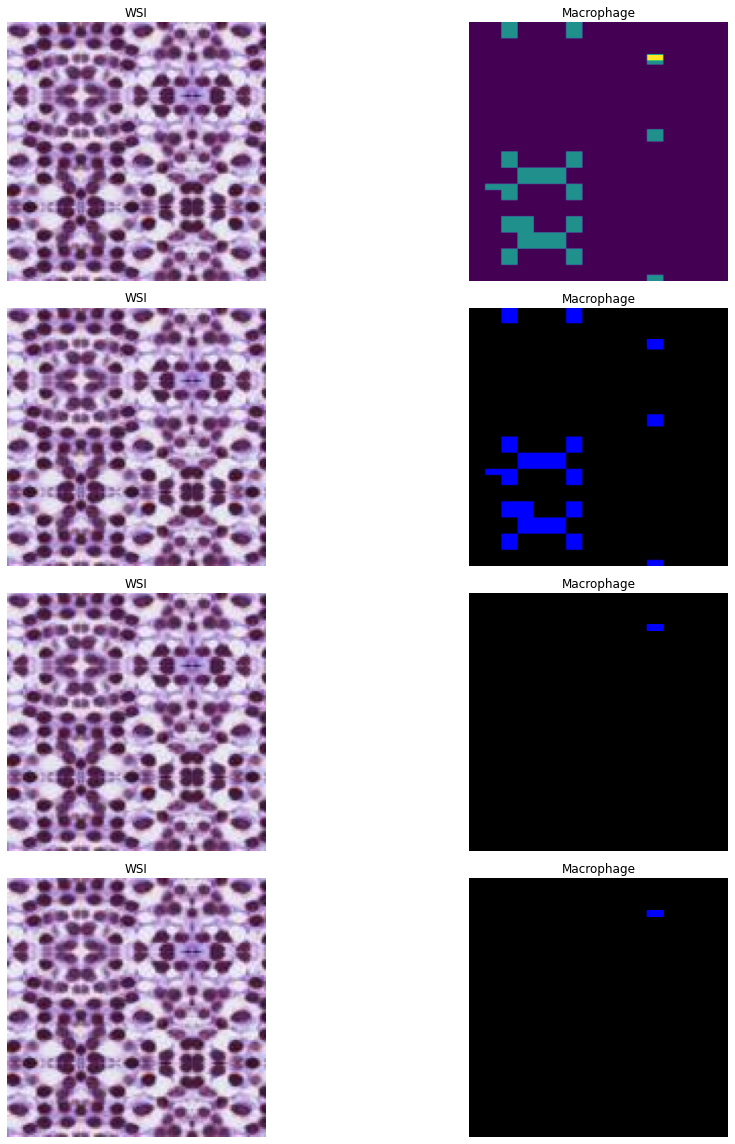


Index:  1
Type_L-_1.jpg
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics\ResultsPredicted\Classify_E_All\Macrophage\Type_L-_1.jpg
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics\ResultsPredicted\Classify_E_All\Macrophage_Mask\Type_L-_1.jpg
(128, 128, 3) (128, 128)


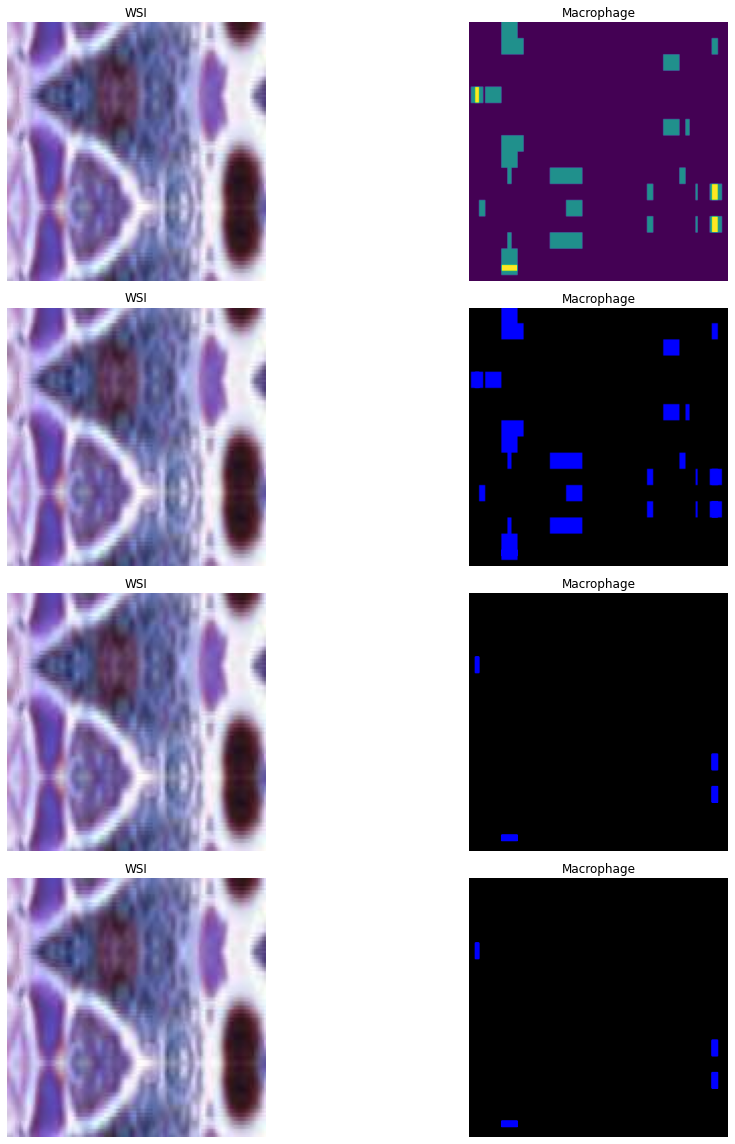


Index:  2
Type_M-_10.jpg
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics\ResultsPredicted\Classify_E_All\Macrophage\Type_M-_10.jpg
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics\ResultsPredicted\Classify_E_All\Macrophage_Mask\Type_M-_10.jpg
(128, 128, 3) (128, 128)


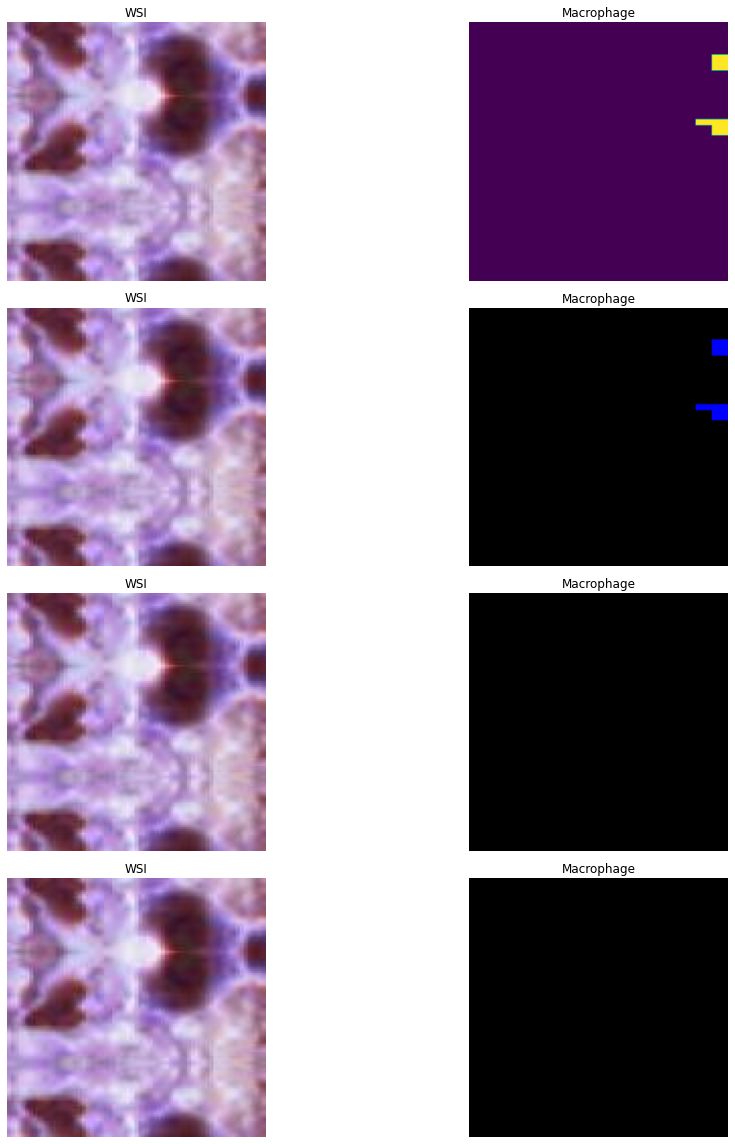


Index:  3
Type_M-_100.jpg
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics\ResultsPredicted\Classify_E_All\Macrophage\Type_M-_100.jpg
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics\ResultsPredicted\Classify_E_All\Macrophage_Mask\Type_M-_100.jpg
(128, 128, 3) (128, 128)


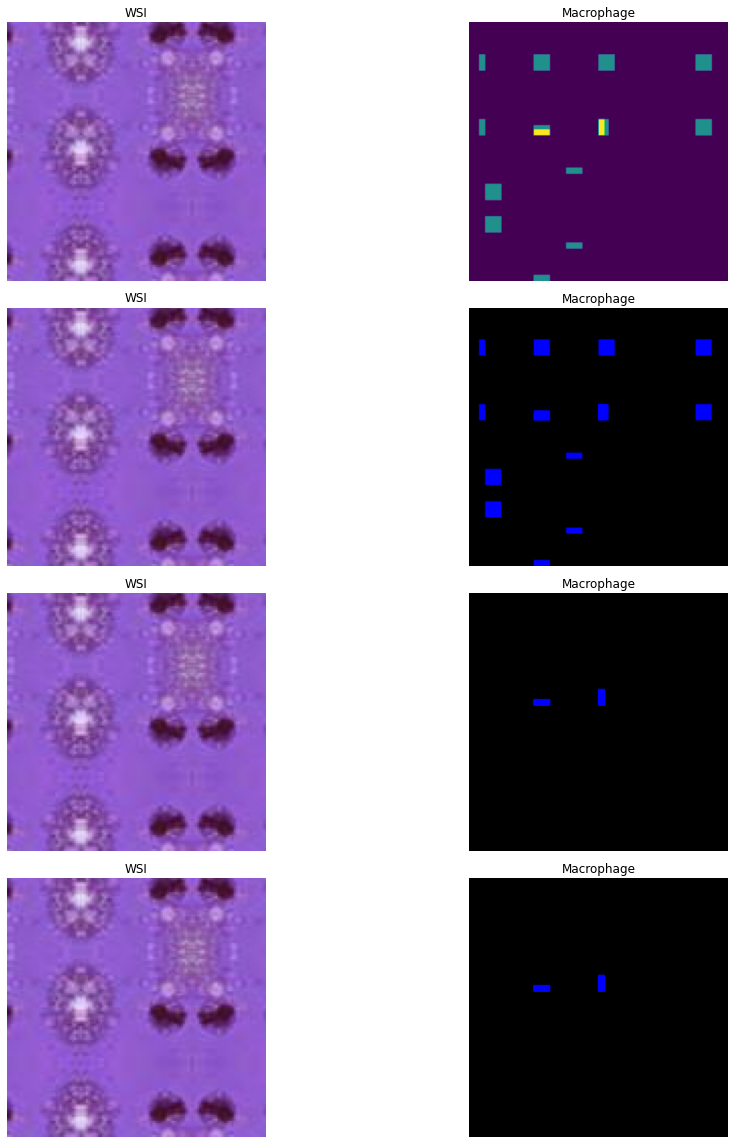


Index:  4
Type_M-_1000.jpg
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics\ResultsPredicted\Classify_E_All\Macrophage\Type_M-_1000.jpg
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics\ResultsPredicted\Classify_E_All\Macrophage_Mask\Type_M-_1000.jpg
(128, 128, 3) (128, 128)


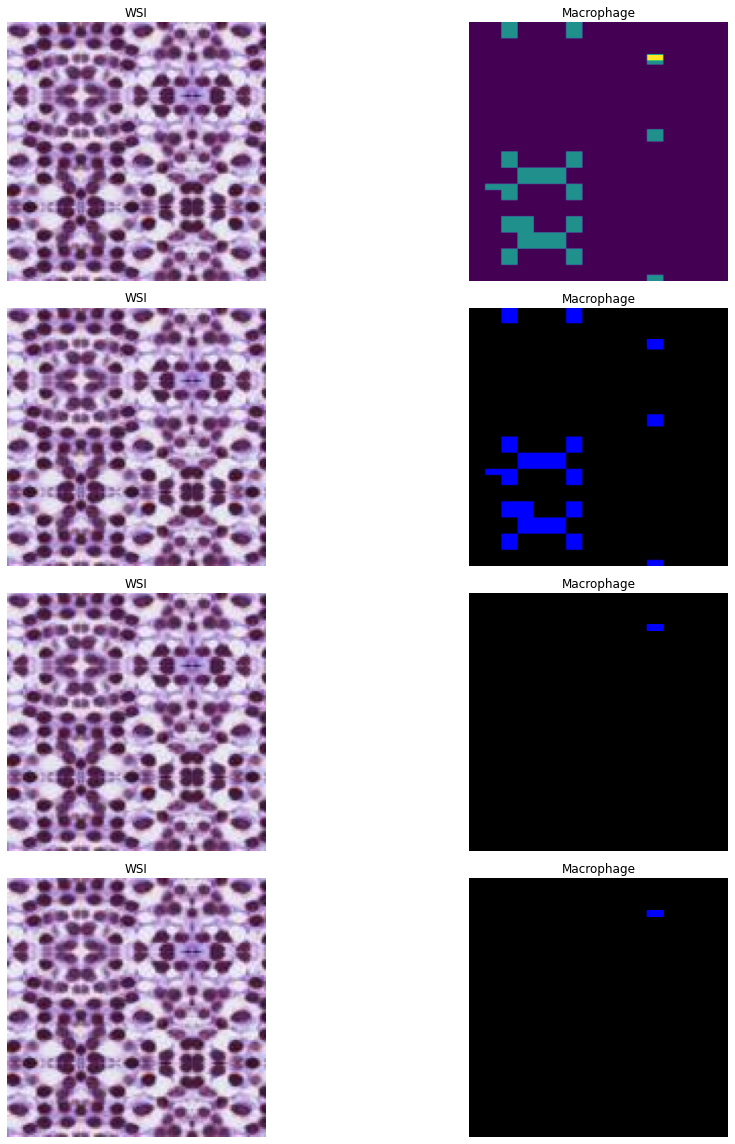

In [11]:
count = 5

for i in range(count):    
    # Random index
    idx = i
#     idx = random.randrange(len(image_fns))
    print("\nIndex: ", idx)
    print(image_fns[idx])
    print(os.path.join(IMAGES_FOLDER, image_fns[idx]))
    print(os.path.join(MASKS_FOLDER, gt_fns[idx]))
    
    image = skimage.io.imread(os.path.join(IMAGES_FOLDER, image_fns[idx]))
    gt = skimage.io.imread(os.path.join(MASKS_FOLDER, gt_fns[idx]))
    
    assert image.shape[:2] == gt.shape, "Wrong image or ground truth!"
    assert image.dtype == gt.dtype, "Wrong data types!"
    print(image.shape, gt.shape)

    sthresh=1
    kernel=3
    close=0
    open_=0
    globalT=True
    otsu=True
    otsu_gaussian=True
    morphological=False
    
    th1_1, th2, th3 = imageThresholding(img = gt,
                      kernel = kernel,
                      sthresh = sthresh,
                      globalT = globalT,
                      otsu = otsu,
                      otsu_gaussian = otsu_gaussian,
                      morphological = morphological,
                      close = close,
                      open_ = open_)
    
    
    sthresh=1
    kernel=3
    close=1
    open_=1
    globalT=True
    otsu=True
    otsu_gaussian=True
    morphological=True
    
    th1_2, th2, th3 = imageThresholding(img = gt,
                      kernel = kernel,
                      sthresh = sthresh,
                      globalT = globalT,
                      otsu = otsu,
                      otsu_gaussian = otsu_gaussian,
                      morphological = morphological,
                      close = close,
                      open_ = open_)
    
    
    if option_CTT==1:
        gt = np.where(gt==255.0, 1.0, gt)
        th1_1 = np.where(th1_1==255.0, 1.0, th1_1)
        th1_2 = np.where(th1_2==255.0, 1.0, th1_2)
    elif option_CTT==2:
        gt = np.where(gt==255.0, 2.0, gt)
        th1_1 = np.where(th1_1==255.0, 2.0, th1_1)
        th1_2 = np.where(th1_2==255.0, 2.0, th1_2)
    elif option_CTT==3:
        gt = np.where(gt==255.0, 3.0, gt)
        th1_1 = np.where(th1_1==255.0, 3.0, th1_1)
        th1_2 = np.where(th1_2==255.0, 3.0, th1_2)
    elif option_CTT==4:
        gt = np.where(gt==255.0, 4.0, gt)
        th1_1 = np.where(th1_1==255.0, 4.0, th1_1)
        th1_2 = np.where(th1_2==255.0, 4.0, th1_2)
    
    gt = gt.astype(np.uint8)
    th1_1 = th1_1.astype(np.uint8)
    th1_2 = th1_2.astype(np.uint8)

    if img is not None and gt is not None and th1_1 is not None and th1_2 is not None:
        fig, axs = plt.subplots(4, 2, figsize=(16,16))
        axs[0,0].imshow(image)
        axs[0,0].set_title("WSI")
        axs[0,0].axis('off')

        axs[0,1].imshow(gt)
        axs[0,1].set_title(gt_T)
        axs[0,1].axis('off')

        
        axs[1,0].imshow(image)
        axs[1,0].set_title("WSI")
        axs[1,0].axis('off')

        axs[1,1].imshow(gt, cmap=map_name, norm=norm)
        axs[1,1].set_title(gt_T)
        axs[1,1].axis('off')

        
        axs[2,0].imshow(image)
        axs[2,0].set_title("WSI")
        axs[2,0].axis('off')

        axs[2,1].imshow(th1_1, cmap=map_name, norm=norm)
        axs[2,1].set_title(gt_T)
        axs[2,1].axis('off')

        axs[3,0].imshow(image)
        axs[3,0].set_title("WSI")
        axs[3,0].axis('off')

        axs[3,1].imshow(th1_2, cmap=map_name, norm=norm)
        axs[3,1].set_title(gt_T)
        axs[3,1].axis('off')
        
        
        plt.tight_layout()
        plt.show()


In [13]:
# Get mean and std of image size
idx = random.randrange(len(image_fns))
# idx = 0 #random.randrange(len(image_fns))
print("\nIndex: ", idx)
print(image_fns[idx])
print(os.path.join(IMAGES_FOLDER, image_fns[idx]))
print(os.path.join(MASKS_FOLDER, gt_fns[idx]))

image = skimage.io.imread(os.path.join(IMAGES_FOLDER, image_fns[idx]))
gt = skimage.io.imread(os.path.join(MASKS_FOLDER, gt_fns[idx]))
print(image_fns[idx])
print(gt_fns[idx])
print(image.shape)
print(gt.shape)



Index:  629
Type_M-_351.jpg
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics\ResultsPredicted\Classify_E_All\Macrophage\Type_M-_351.jpg
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics\ResultsPredicted\Classify_E_All\Macrophage_Mask\Type_M-_351.jpg
Type_M-_351.jpg
Type_M-_351.jpg
(128, 128, 3)
(128, 128)


In [14]:
w = []
h = []

image_fns = sorted(next(os.walk(IMAGES_FOLDER))[2])

for i in range(len(image_fns)):
    image = skimage.io.imread(os.path.join(IMAGES_FOLDER, image_fns[i]))
    w.append(image.shape[1])
    h.append(image.shape[0])
    
w = np.array(w)
h = np.array(h)

print(w.shape, h.shape)

(1348,) (1348,)


In [15]:
# Mean of hieght
np.mean(h), np.std(h)

(128.0, 0.0)

In [16]:
# Mean of hieght
np.mean(w), np.std(w)

(128.0, 0.0)

In [17]:
np.max(h), np.min(h)

(128, 128)

In [18]:
np.max(w), np.min(w)

(128, 128)

In [19]:
print(option_CTT)

3


In [20]:
import os, shutil

# You can disable debugging logs with os.environ.
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# Possible values are as follows:
# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed

cls = lambda: os.system('clear')
print(os.getcwd())

import inspect, cv2, sys, pickle, gc, os, zipfile
import pandas as pd, numpy as np, sklearn as sk
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.utils import np_utils
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from pandas import read_csv

# Import libs
import time
import skimage.draw
import random
import keras
import matplotlib.pyplot as plt
import matplotlib.colors
import scipy.io as sio
from PIL import Image
import scipy
import scipy.ndimage
import keras.backend as K
import segmentation_models as sm

# import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 


from skimage import io

cls()

print()
print(f"Python Version: {sys.version}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print(f"Numpy Version: {np.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"OpenCV Version: {cv2.__version__}")
print(f"Scikit-Learn Version: {sk.__version__}")
print("GPU is", "available" if tf.test.is_gpu_available() \
      else "NOT AVAILABLE")

# gpus = tf.config.experimental.list_physical_devices('GPU')
# gpus = tf.config.list_physical_devices('GPU')
# print("GPU is", "available" if gpus \
#       else "NOT AVAILABLE")

D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22


Using TensorFlow backend.


Segmentation Models: using `keras` framework.
Instructions for updating:
non-resource variables are not supported in the long term

Python Version: 3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]
Tensor Flow Version: 1.15.0
Keras Version: 2.2.4
Numpy Version: 1.19.2
Pandas Version: 1.1.5
OpenCV Version: 4.6.0
Scikit-Learn Version: 0.24.2
GPU is available


In [21]:
import splitfolders
import shutil
import matplotlib.colors

import albumentations as A

import keras, sys, numpy as np, os, cv2, math
from sklearn.metrics import recall_score, roc_auc_score, accuracy_score, confusion_matrix
from keras.callbacks import TensorBoard, ModelCheckpoint
# np.random.seed(42)

import scipy.misc as mc
from sklearn.model_selection import KFold

# data_location = ''
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.callbacks import  ModelCheckpoint
import scipy.misc as mc

import keras.backend as K
from keras import backend as K
from keras.optimizers import *
from keras.models import *

from keras.layers import *
from keras.layers import Input, Conv2D, Conv1D, Conv2DTranspose, BatchNormalization, Concatenate, Activation, Dropout, concatenate, multiply, core
from keras.layers import MaxPooling2D, UpSampling2D, GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, Permute, Add, Activation, Lambda, Reshape

from sklearn.model_selection import StratifiedKFold

from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.utils.vis_utils import plot_model as plot

from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, KFold


In [22]:
# print(device_lib.list_local_devices())# 사용 가능한 모든 디바이스를 출력: RTX 3090 정보 출력

# # GPU Check 1  
# gpus = tf.config.experimental.list_physical_devices('CPU')
# for gpu in gpus:
#     print("\nName:", gpu.name, "  Type:", gpu.device_type)
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     print("Name:", gpu.name, "  Type:", gpu.device_type)

# # GPU Check 2
# tf.config.list_physical_devices('GPU')
# #tf.test.is_gpu_available('GPU') 위의 함수로 바뀐다고 함 (2.4.0)
# print("\n",tf.sysconfig.get_build_info())

# GPU Check 3
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11172520834861894093
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15125499085
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15999681629102294278
physical_device_desc: "device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5"
]


In [24]:
work_directory_R_S = os.getcwd() + "/January_WRadiomics_Model_0/ResultsPredicted_Split"
work_directory_R_S_T = os.getcwd() + "/January_WRadiomics_Model_0/"

try:
    # Make directory
    create_directory(work_directory_R_S)
except OSError:
    print ("Creation of the Split Predict directory %s failed" % work_directory_R_S)

try:
    # Make directory
    create_directory(work_directory_R_S_T)
except OSError:
    print ("Creation of the Split Predict directory %s failed" % work_directory_R_S_T)
    
patchsize = 128

In [25]:
print(option_CTT)
print(IMAGES_FOLDER_Main)
print(MASKS_FOLDER_Main)

print(work_directory_R_S)
print(work_directory_R_S_T)

3
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics\ResultsPredicted\Classify_E_All
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics\ResultsPredicted\Classify_E_All
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics_Model_0/ResultsPredicted_Split
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics_Model_0/


In [26]:
def split_names(dataset_dir1, dataset_dir2):
    
    allFileNames = os.listdir(dataset_dir1)
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames), [int(len(allFileNames)*0.7), int(len(allFileNames)*0.75)])

    train_FileNames_x = [dataset_dir1 + '/' + name1 for name1 in train_FileNames.tolist()]
    val_FileNames_x = [dataset_dir1 + '/' + name2 for name2 in val_FileNames.tolist()]
    test_FileNames_x = [dataset_dir1 + '/' + name3 for name3 in test_FileNames.tolist()]
    
    train_FileNames_y = [dataset_dir2 + '/' + name1 for name1 in train_FileNames.tolist()]
    val_FileNames_y = [dataset_dir2 + '/' + name2 for name2 in val_FileNames.tolist()]
    test_FileNames_y = [dataset_dir2 + '/' + name3 for name3 in test_FileNames.tolist()]
    
    return train_FileNames_x, val_FileNames_x, test_FileNames_x, train_FileNames_y, val_FileNames_y, test_FileNames_y
    
    
def Return_Type(option_CTT, tail):
    
    temp =  0
    
    if option_CTT == 1:
        if tail == "Epithelial":
            temp = 1
        if tail == "Epithelial_Mask":
            temp = 2
    elif option_CTT == 2:
        if tail == "Lymphocyte":
            temp = 1
        if tail == "Lymphocyte_Mask":
            temp = 2
    elif option_CTT == 3:
        if tail == "Macrophage":
            temp = 1
        if tail == "Macrophage_Mask":
            temp = 2
    elif option_CTT == 4:
        if tail == "Neutrophil":
            temp = 1
        if tail == "Neutrophil_Mask":
            temp = 2
            
    return temp
    
    
def Return_Images(IMAGES_FOLDER_Main, MASKS_FOLDER_Main, option_CTT):
    
    IMAGES_SUB_FOLDER, MASKS_SUB_FOLDER = [], []
    
    print("Option: %s" % option_CTT, "\n")
    for (root, d_names, f_names) in os.walk(IMAGES_FOLDER_Main, topdown=True):
        tail = os.path.split(root)
        print("Type: %s" % tail[1])

        temp = Return_Type(option_CTT, tail[1])
    
        if temp==1:
            for filename in f_names:
                IMAGES_temp = os.path.join(root, filename)
                IMAGES_SUB_FOLDER.append(IMAGES_temp)
        else:
            continue

    
    for (root, d_names, f_names) in os.walk(MASKS_FOLDER_Main, topdown=True):
        tail = os.path.split(root)
        print("Type: %s" % tail[1])

        temp = Return_Type(option_CTT, tail[1])
    
        if temp==2:
            for filename in f_names:
                MASKS_temp = os.path.join(root, filename)
                MASKS_SUB_FOLDER.append(MASKS_temp)    
        else:
            continue

    return IMAGES_SUB_FOLDER, MASKS_SUB_FOLDER
    
    
Folder = "Image"
IMAGES_DEST_Final = os.path.join(work_directory_R_S, Feature_Type, Folder)

Folder = "Mask"
MASKS_DEST_Final = os.path.join(work_directory_R_S, Feature_Type, Folder)

# Make new folders
try:
    # Make directory
    create_directory(IMAGES_DEST_Final)
except OSError:
    print ("Creation of the image directory %s failed" % IMAGES_DEST_Final)

try:
    # Make directory
    create_directory(MASKS_DEST_Final)
except OSError:
    print ("Creation of the mask directory %s failed" % MASKS_DEST_Final)

splitfolders.ratio(IMAGES_FOLDER_Main, output=IMAGES_DEST_Final, seed=1337, ratio=(.8, .0, .2))
splitfolders.ratio(MASKS_FOLDER_Main, output=MASKS_DEST_Final, seed=1337, ratio=(.8, .0, .2))

Name_Nuclei_Save =  os.path.join(work_directory_R_S, Feature_Type, Name_Nuclei)

try:
    # Make directory
    create_directory(Name_Nuclei_Save)
except OSError:
    print ("Creation of the directory %s failed" % Name_Nuclei_Save)
    
    
FolderTrain = "Train"
FolderTest = "Test"

IMAGES_DEST_Train_C =  os.path.join(Name_Nuclei_Save, FolderTrain)
IMAGES_DEST_Test_C =  os.path.join(Name_Nuclei_Save, FolderTest)


FolderTrain = "Mask_Train"
FolderTest = "Mask_Test"

MASKS_DEST_Train_C = os.path.join(Name_Nuclei_Save, FolderTrain)
MASKS_DEST_Test_C = os.path.join(Name_Nuclei_Save, FolderTest)
    
    
# Make new folders
try:
    # Make directory
    create_directory(IMAGES_DEST_Train_C)
    create_directory(IMAGES_DEST_Test_C)
except OSError:
    print ("Creation of the image directory %s failed" % IMAGES_DEST_Train_C)
    print ("Creation of the image directory %s failed" % IMAGES_DEST_Test_C)
    

try:
    # Make directory
    create_directory(MASKS_DEST_Train_C)
    create_directory(MASKS_DEST_Test_C)
except OSError:
    print ("Creation of the mask directory %s failed" % MASKS_DEST_Train_C)
    print ("Creation of the mask directory %s failed" % MASKS_DEST_Test_C)


FolderTrain = "train"
FolderTest = "test"

# Training data
x_train_dir, y_train_dir = Return_Images(os.path.join(IMAGES_DEST_Final, FolderTrain), os.path.join(MASKS_DEST_Final, FolderTrain), option_CTT)

# Test data
x_test_dir, y_test_dir = Return_Images(os.path.join(IMAGES_DEST_Final, FolderTest), os.path.join(MASKS_DEST_Final, FolderTest), option_CTT)

print("\nTraining Image & Mask Samples:", len(x_train_dir) , len(y_train_dir))
print("Testing Image & Mask Samples:", len(x_test_dir)  , len(y_test_dir))

# Copy-pasting images
for name in x_train_dir:
    shutil.copy(name, IMAGES_DEST_Train_C)

for name in x_test_dir:
    shutil.copy(name, IMAGES_DEST_Test_C)

# Copy-pasting images
for name in y_train_dir:
    shutil.copy(name, MASKS_DEST_Train_C)

for name in y_test_dir:
    shutil.copy(name, MASKS_DEST_Test_C)    


shutil.rmtree(IMAGES_DEST_Final)
shutil.rmtree(MASKS_DEST_Final)


Copying files: 14926 files [00:21, 690.95 files/s] 
Copying files: 14926 files [00:11, 1285.66 files/s]


Option: 3 

Type: train
Type: Epithelial
Type: Epithelial_Mask
Type: Lymphocyte
Type: Lymphocyte_Mask
Type: Macrophage
Type: Macrophage_Mask
Type: Neutrophil
Type: Neutrophil_Mask
Type: train
Type: Epithelial
Type: Epithelial_Mask
Type: Lymphocyte
Type: Lymphocyte_Mask
Type: Macrophage
Type: Macrophage_Mask
Type: Neutrophil
Type: Neutrophil_Mask
Option: 3 

Type: test
Type: Epithelial
Type: Epithelial_Mask
Type: Lymphocyte
Type: Lymphocyte_Mask
Type: Macrophage
Type: Macrophage_Mask
Type: Neutrophil
Type: Neutrophil_Mask
Type: test
Type: Epithelial
Type: Epithelial_Mask
Type: Lymphocyte
Type: Lymphocyte_Mask
Type: Macrophage
Type: Macrophage_Mask
Type: Neutrophil
Type: Neutrophil_Mask

Training Image & Mask Samples: 1078 1078
Testing Image & Mask Samples: 270 270


In [27]:
print(Name_Nuclei_Save)
print(IMAGES_DEST_Train_C)
print(IMAGES_DEST_Test_C)

D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics_Model_0/ResultsPredicted_Split\Classify_E_All\Macrophage
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics_Model_0/ResultsPredicted_Split\Classify_E_All\Macrophage\Train
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics_Model_0/ResultsPredicted_Split\Classify_E_All\Macrophage\Test


In [28]:
FolderTrain = "Train"
FolderTest = "Test"

FolderTrain_M = "Mask_Train"
FolderTest_M = "Mask_Test"

# Training data
x_train_dir = IMAGES_DEST_Train_C
y_train_dir = MASKS_DEST_Train_C

# Test data
x_test_dir = IMAGES_DEST_Test_C
y_test_dir = MASKS_DEST_Test_C

print("\nTraining Samples: ", len(os.listdir(x_train_dir)) , len(os.listdir(y_train_dir)))
print("Validation Samples: ", len(os.listdir(x_test_dir))  , len(os.listdir(y_test_dir)))


Training Samples:  1078 1078
Validation Samples:  270 270


In [29]:
print(x_train_dir)
print(x_test_dir)

D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics_Model_0/ResultsPredicted_Split\Classify_E_All\Macrophage\Train
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics_Model_0/ResultsPredicted_Split\Classify_E_All\Macrophage\Test


#### Dataloader and utility functions¶

In [30]:
# Helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    
    norm=plt.Normalize(0,1) # 5 classes including BG

    if option_CTT==1:
        map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "red"])
    elif option_CTT==2:
        map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "yellow"])
    elif option_CTT==3:
        map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "blue"])
    elif option_CTT==4:
        map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "green"])
    elif option_CTT==5:
        map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "red","yellow","blue", "green"])

    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image, cmap=map_name, norm=norm)
    plt.show()
    
    
# Helper function for data visualization    
def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)    
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)
    return x
    
    
# Classes for data loading and preprocessing
class Dataset:
    """MoNuSAC Dataset. Read images, apply augmentation and preprocessing transformations.
    
    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        class_values (list): values of classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline 
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing 
            (e.g. noralization, shape manipulation, etc.)
    
    """
    
#     CLASSES = ['Epithelial', 'Lymphocyte', 'Neutrophil', 'Macrophage', 'unlabelled']
    if option_CTT==1:
        CLASSES = ['unlabelled', 'Epithelial']
    elif option_CTT==2:
        CLASSES = ['unlabelled', 'Lymphocyte']
    elif option_CTT==3:
        CLASSES = ['unlabelled', 'Macrophage']
    elif option_CTT==4:
        CLASSES = ['unlabelled', 'Neutrophil']
    elif option_CTT==5:
        CLASSES = ['unlabelled', 'Epithelial', 'Lymphocyte', 'Neutrophil', 'Macrophage']
    
#    label_map = {'Epithelial':1, RED
#             'Lymphocyte':2, YELLOW
#             'Macrophage':4, GREEN
#             'Neutrophil':3, BLUE
#            }
    
    def __init__(
            self, 
            images_dir, 
            masks_dir, 
            classes=None, 
            augmentation=None, 
            preprocessing=None,
    ):
        self.ids = os.listdir(images_dir)
        
        # Unsorted
        #self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids]
        #self.masks_fps = [os.path.join(masks_dir, image_id) for image_id in self.ids]
        
        # Sorted
        self.images_fps = sorted([os.path.join(images_dir, image_id) for image_id in self.ids])
        self.masks_fps = sorted([os.path.join(masks_dir, image_id) for image_id in self.ids])
        
        # convert str names to class values on masks
        self.class_values = [self.CLASSES.index(cls) for cls in classes] # cls used instead of cls.lower()

        self.augmentation = augmentation
        self.preprocessing = preprocessing
    
    def __getitem__(self, i):
        
        # Read data
        image = cv2.imread(self.images_fps[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        mask = cv2.imread(self.masks_fps[i], 0)
        
        # Extract certain classes from mask
        masks = [(mask == v) for v in self.class_values]
        mask = np.stack(masks, axis=-1).astype('float')

        # Add background if mask is not binary
        if mask.shape[-1] != 1:
            background = 1 - mask.sum(axis=-1, keepdims=True)
            mask = np.concatenate((mask, background), axis=-1)

        # Apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        # Apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        return image, mask

    def __len__(self):
        return len(self.ids)
    
    
class Dataloder(tf.keras.utils.Sequence):
    """Load data from dataset and form batches
    
    Args:
        dataset: instance of Dataset class for image loading and preprocessing.
        batch_size: Integet number of images in batch.
        shuffle: Boolean, if `True` shuffle image indexes each epoch.
    """
    
    def __init__(self, dataset, batch_size=1, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(dataset))

        self.on_epoch_end()

    def __getitem__(self, i):
        
        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])
        
        # Transpose list of lists
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]
        
        # newer version of tf/keras want batch to be in tuple rather than list
        return tuple(batch)        
    
    def __len__(self):
        """Denotes the number of batches per epoch"""
        return len(self.indexes) // self.batch_size
    
    def on_epoch_end(self):
        """Callback function to shuffle indexes each epoch"""
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)


In [31]:
print(option_CTT)

3


In [32]:
# Load a random image from the images folder
image_fns = sorted(next(os.walk(x_train_dir))[2])
gt_fns = sorted(next(os.walk(y_train_dir))[2])

if option_CTT==1:
    med = ['Epithelial']
elif option_CTT==2:
    med = ['Lymphocyte']
elif option_CTT==3:
    med = ['Macrophage']
elif option_CTT==4:
    med = ['Neutrophil']
elif option_CTT==5:
    med = ['Epithelial', 'Lymphocyte', 'Neutrophil', 'Macrophage']

dataset = Dataset(x_train_dir, y_train_dir, classes=med)

for idx in range(len(image_fns)):
    image, mask = dataset[idx] 
    
    print("Index: ", idx)
    print(image.shape, mask.shape)

Index:  0
(128, 128, 3) (128, 128, 1)
Index:  1
(128, 128, 3) (128, 128, 1)
Index:  2
(128, 128, 3) (128, 128, 1)
Index:  3
(128, 128, 3) (128, 128, 1)
Index:  4
(128, 128, 3) (128, 128, 1)
Index:  5
(128, 128, 3) (128, 128, 1)
Index:  6
(128, 128, 3) (128, 128, 1)
Index:  7
(128, 128, 3) (128, 128, 1)
Index:  8
(128, 128, 3) (128, 128, 1)
Index:  9
(128, 128, 3) (128, 128, 1)
Index:  10
(128, 128, 3) (128, 128, 1)
Index:  11
(128, 128, 3) (128, 128, 1)
Index:  12
(128, 128, 3) (128, 128, 1)
Index:  13
(128, 128, 3) (128, 128, 1)
Index:  14
(128, 128, 3) (128, 128, 1)
Index:  15
(128, 128, 3) (128, 128, 1)
Index:  16
(128, 128, 3) (128, 128, 1)
Index:  17
(128, 128, 3) (128, 128, 1)
Index:  18
(128, 128, 3) (128, 128, 1)
Index:  19
(128, 128, 3) (128, 128, 1)
Index:  20
(128, 128, 3) (128, 128, 1)
Index:  21
(128, 128, 3) (128, 128, 1)
Index:  22
(128, 128, 3) (128, 128, 1)
Index:  23
(128, 128, 3) (128, 128, 1)
Index:  24
(128, 128, 3) (128, 128, 1)
Index:  25
(128, 128, 3) (128, 128,

Index:  251
(128, 128, 3) (128, 128, 1)
Index:  252
(128, 128, 3) (128, 128, 1)
Index:  253
(128, 128, 3) (128, 128, 1)
Index:  254
(128, 128, 3) (128, 128, 1)
Index:  255
(128, 128, 3) (128, 128, 1)
Index:  256
(128, 128, 3) (128, 128, 1)
Index:  257
(128, 128, 3) (128, 128, 1)
Index:  258
(128, 128, 3) (128, 128, 1)
Index:  259
(128, 128, 3) (128, 128, 1)
Index:  260
(128, 128, 3) (128, 128, 1)
Index:  261
(128, 128, 3) (128, 128, 1)
Index:  262
(128, 128, 3) (128, 128, 1)
Index:  263
(128, 128, 3) (128, 128, 1)
Index:  264
(128, 128, 3) (128, 128, 1)
Index:  265
(128, 128, 3) (128, 128, 1)
Index:  266
(128, 128, 3) (128, 128, 1)
Index:  267
(128, 128, 3) (128, 128, 1)
Index:  268
(128, 128, 3) (128, 128, 1)
Index:  269
(128, 128, 3) (128, 128, 1)
Index:  270
(128, 128, 3) (128, 128, 1)
Index:  271
(128, 128, 3) (128, 128, 1)
Index:  272
(128, 128, 3) (128, 128, 1)
Index:  273
(128, 128, 3) (128, 128, 1)
Index:  274
(128, 128, 3) (128, 128, 1)
Index:  275
(128, 128, 3) (128, 128, 1)


Index:  473
(128, 128, 3) (128, 128, 1)
Index:  474
(128, 128, 3) (128, 128, 1)
Index:  475
(128, 128, 3) (128, 128, 1)
Index:  476
(128, 128, 3) (128, 128, 1)
Index:  477
(128, 128, 3) (128, 128, 1)
Index:  478
(128, 128, 3) (128, 128, 1)
Index:  479
(128, 128, 3) (128, 128, 1)
Index:  480
(128, 128, 3) (128, 128, 1)
Index:  481
(128, 128, 3) (128, 128, 1)
Index:  482
(128, 128, 3) (128, 128, 1)
Index:  483
(128, 128, 3) (128, 128, 1)
Index:  484
(128, 128, 3) (128, 128, 1)
Index:  485
(128, 128, 3) (128, 128, 1)
Index:  486
(128, 128, 3) (128, 128, 1)
Index:  487
(128, 128, 3) (128, 128, 1)
Index:  488
(128, 128, 3) (128, 128, 1)
Index:  489
(128, 128, 3) (128, 128, 1)
Index:  490
(128, 128, 3) (128, 128, 1)
Index:  491
(128, 128, 3) (128, 128, 1)
Index:  492
(128, 128, 3) (128, 128, 1)
Index:  493
(128, 128, 3) (128, 128, 1)
Index:  494
(128, 128, 3) (128, 128, 1)
Index:  495
(128, 128, 3) (128, 128, 1)
Index:  496
(128, 128, 3) (128, 128, 1)
Index:  497
(128, 128, 3) (128, 128, 1)


Index:  700
(128, 128, 3) (128, 128, 1)
Index:  701
(128, 128, 3) (128, 128, 1)
Index:  702
(128, 128, 3) (128, 128, 1)
Index:  703
(128, 128, 3) (128, 128, 1)
Index:  704
(128, 128, 3) (128, 128, 1)
Index:  705
(128, 128, 3) (128, 128, 1)
Index:  706
(128, 128, 3) (128, 128, 1)
Index:  707
(128, 128, 3) (128, 128, 1)
Index:  708
(128, 128, 3) (128, 128, 1)
Index:  709
(128, 128, 3) (128, 128, 1)
Index:  710
(128, 128, 3) (128, 128, 1)
Index:  711
(128, 128, 3) (128, 128, 1)
Index:  712
(128, 128, 3) (128, 128, 1)
Index:  713
(128, 128, 3) (128, 128, 1)
Index:  714
(128, 128, 3) (128, 128, 1)
Index:  715
(128, 128, 3) (128, 128, 1)
Index:  716
(128, 128, 3) (128, 128, 1)
Index:  717
(128, 128, 3) (128, 128, 1)
Index:  718
(128, 128, 3) (128, 128, 1)
Index:  719
(128, 128, 3) (128, 128, 1)
Index:  720
(128, 128, 3) (128, 128, 1)
Index:  721
(128, 128, 3) (128, 128, 1)
Index:  722
(128, 128, 3) (128, 128, 1)
Index:  723
(128, 128, 3) (128, 128, 1)
Index:  724
(128, 128, 3) (128, 128, 1)


Index:  952
(128, 128, 3) (128, 128, 1)
Index:  953
(128, 128, 3) (128, 128, 1)
Index:  954
(128, 128, 3) (128, 128, 1)
Index:  955
(128, 128, 3) (128, 128, 1)
Index:  956
(128, 128, 3) (128, 128, 1)
Index:  957
(128, 128, 3) (128, 128, 1)
Index:  958
(128, 128, 3) (128, 128, 1)
Index:  959
(128, 128, 3) (128, 128, 1)
Index:  960
(128, 128, 3) (128, 128, 1)
Index:  961
(128, 128, 3) (128, 128, 1)
Index:  962
(128, 128, 3) (128, 128, 1)
Index:  963
(128, 128, 3) (128, 128, 1)
Index:  964
(128, 128, 3) (128, 128, 1)
Index:  965
(128, 128, 3) (128, 128, 1)
Index:  966
(128, 128, 3) (128, 128, 1)
Index:  967
(128, 128, 3) (128, 128, 1)
Index:  968
(128, 128, 3) (128, 128, 1)
Index:  969
(128, 128, 3) (128, 128, 1)
Index:  970
(128, 128, 3) (128, 128, 1)
Index:  971
(128, 128, 3) (128, 128, 1)
Index:  972
(128, 128, 3) (128, 128, 1)
Index:  973
(128, 128, 3) (128, 128, 1)
Index:  974
(128, 128, 3) (128, 128, 1)
Index:  975
(128, 128, 3) (128, 128, 1)
Index:  976
(128, 128, 3) (128, 128, 1)


In [33]:
# Load a random image from the images folder
image_fns = sorted(next(os.walk(x_test_dir))[2])
gt_fns = sorted(next(os.walk(y_test_dir))[2])

dataset = Dataset(x_test_dir, y_test_dir, classes=med)

for idx in range(len(image_fns)):
    image, mask = dataset[idx] 
    
    print("Index: ", idx)
    print(image.shape, mask.shape)

Index:  0
(128, 128, 3) (128, 128, 1)
Index:  1
(128, 128, 3) (128, 128, 1)
Index:  2
(128, 128, 3) (128, 128, 1)
Index:  3
(128, 128, 3) (128, 128, 1)
Index:  4
(128, 128, 3) (128, 128, 1)
Index:  5
(128, 128, 3) (128, 128, 1)
Index:  6
(128, 128, 3) (128, 128, 1)
Index:  7
(128, 128, 3) (128, 128, 1)
Index:  8
(128, 128, 3) (128, 128, 1)
Index:  9
(128, 128, 3) (128, 128, 1)
Index:  10
(128, 128, 3) (128, 128, 1)
Index:  11
(128, 128, 3) (128, 128, 1)
Index:  12
(128, 128, 3) (128, 128, 1)
Index:  13
(128, 128, 3) (128, 128, 1)
Index:  14
(128, 128, 3) (128, 128, 1)
Index:  15
(128, 128, 3) (128, 128, 1)
Index:  16
(128, 128, 3) (128, 128, 1)
Index:  17
(128, 128, 3) (128, 128, 1)
Index:  18
(128, 128, 3) (128, 128, 1)
Index:  19
(128, 128, 3) (128, 128, 1)
Index:  20
(128, 128, 3) (128, 128, 1)
Index:  21
(128, 128, 3) (128, 128, 1)
Index:  22
(128, 128, 3) (128, 128, 1)
Index:  23
(128, 128, 3) (128, 128, 1)
Index:  24
(128, 128, 3) (128, 128, 1)
Index:  25
(128, 128, 3) (128, 128,

Index:  226
(128, 128, 3) (128, 128, 1)
Index:  227
(128, 128, 3) (128, 128, 1)
Index:  228
(128, 128, 3) (128, 128, 1)
Index:  229
(128, 128, 3) (128, 128, 1)
Index:  230
(128, 128, 3) (128, 128, 1)
Index:  231
(128, 128, 3) (128, 128, 1)
Index:  232
(128, 128, 3) (128, 128, 1)
Index:  233
(128, 128, 3) (128, 128, 1)
Index:  234
(128, 128, 3) (128, 128, 1)
Index:  235
(128, 128, 3) (128, 128, 1)
Index:  236
(128, 128, 3) (128, 128, 1)
Index:  237
(128, 128, 3) (128, 128, 1)
Index:  238
(128, 128, 3) (128, 128, 1)
Index:  239
(128, 128, 3) (128, 128, 1)
Index:  240
(128, 128, 3) (128, 128, 1)
Index:  241
(128, 128, 3) (128, 128, 1)
Index:  242
(128, 128, 3) (128, 128, 1)
Index:  243
(128, 128, 3) (128, 128, 1)
Index:  244
(128, 128, 3) (128, 128, 1)
Index:  245
(128, 128, 3) (128, 128, 1)
Index:  246
(128, 128, 3) (128, 128, 1)
Index:  247
(128, 128, 3) (128, 128, 1)
Index:  248
(128, 128, 3) (128, 128, 1)
Index:  249
(128, 128, 3) (128, 128, 1)
Index:  250
(128, 128, 3) (128, 128, 1)


In [34]:
print(x_train_dir)
print(y_train_dir)

D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics_Model_0/ResultsPredicted_Split\Classify_E_All\Macrophage\Train
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics_Model_0/ResultsPredicted_Split\Classify_E_All\Macrophage\Mask_Train


### Test the dataset class 

['Type_L-_1.jpg', 'Type_M-_10.jpg', 'Type_M-_100.jpg'] ['Type_L-_1.jpg', 'Type_M-_10.jpg', 'Type_M-_100.jpg']

Index:  609
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics_Model_0/ResultsPredicted_Split\Classify_E_All\Macrophage\Train\Type_M-_467.jpg
D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics_Model_0/ResultsPredicted_Split\Classify_E_All\Macrophage\Mask_Train\Type_M-_467.jpg
Type_M-_467.jpg
Type_M-_467.jpg
(128, 128, 3)
(128, 128)
(128, 128, 3) (128, 128)
Ground truth classes:  [0 1]


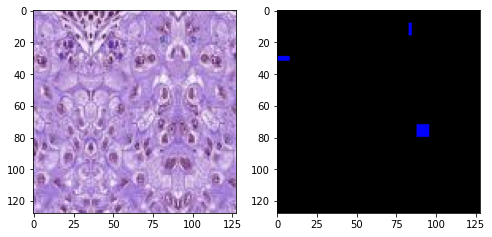

In [35]:
# Load a random image from the images folder
image_fns = sorted(next(os.walk(x_train_dir))[2])
gt_fns = sorted(next(os.walk(y_train_dir))[2])

# Get random number
idx = random.randrange(len(image_fns))
print("\nIndex: ", idx)

# Read image and mask
print(os.path.join(x_train_dir, image_fns[idx]))
print(os.path.join(y_train_dir, gt_fns[idx]))

image = skimage.io.imread(os.path.join(x_train_dir, image_fns[idx]))
gt = skimage.io.imread(os.path.join(y_train_dir, gt_fns[idx]))

print(image_fns[idx])
print(gt_fns[idx])
print(image.shape)
print(gt.shape)

# Flags
assert image.shape[:2] == gt.shape, "Wrong image or ground truth!"
assert image.dtype == gt.dtype, "Wrong data types!"

print(image.shape, gt.shape)

val1 = gt.flatten()
print("Ground truth classes: ", np.unique(val1))


norm=plt.Normalize(0,1) # 5 classes including BG

if option_CTT==1:
    map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "red"])

elif option_CTT==2:
    map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "yellow"])

elif option_CTT==3:
    map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "blue"])

elif option_CTT==4:
    map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "green"])

elif option_CTT==5:
    map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "red","yellow","blue", "green"])
    
f, axarr = plt.subplots(1,2, figsize=(8,8))

# idx = 94 all classes

axarr[0].imshow(image, cmap=map_name, norm=norm)
axarr[1].imshow(gt, cmap=map_name, norm=norm)

Index:  334
(128, 128, 3) (128, 128, 1)


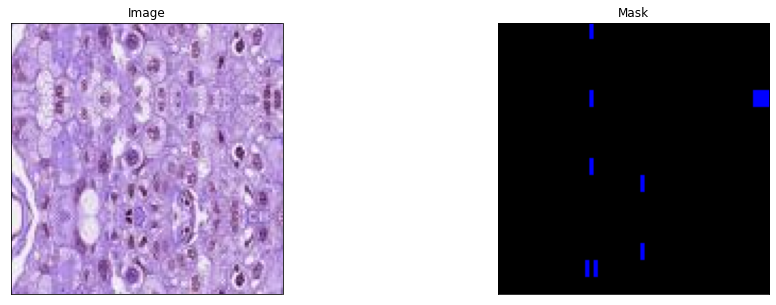

In [37]:
#label_map = {'Epithelial':1,
#         'Lymphocyte':2,
#         'Macrophage':4,
#         'Neutrophil':3,
#        }

if option_CTT==1:
    med = ['Epithelial']
elif option_CTT==2:
    med = ['Lymphocyte']
elif option_CTT==3:
    med = ['Macrophage']
elif option_CTT==4:
    med = ['Neutrophil']
elif option_CTT==5:
    med = ['Epithelial', 'Lymphocyte', 'Neutrophil', 'Macrophage']

dataset = Dataset(x_train_dir, y_train_dir, classes=med)

# Get random number
idx = random.randrange(len(image_fns))
image, mask = dataset[idx] 

print("Index: ", idx)
print(image.shape, mask.shape)

visualize(
    image=image, 
    mask = mask[..., 0].squeeze(),
)

(128, 128, 3) (128, 128, 1)


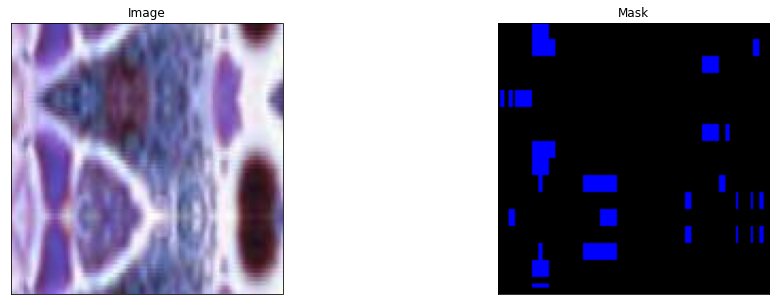

(128, 128, 3) (128, 128, 1)


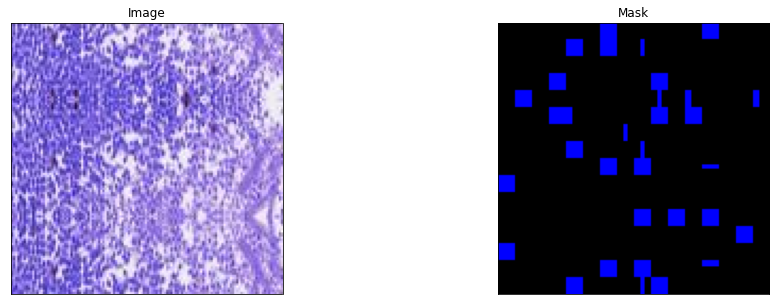

(128, 128, 3) (128, 128, 1)


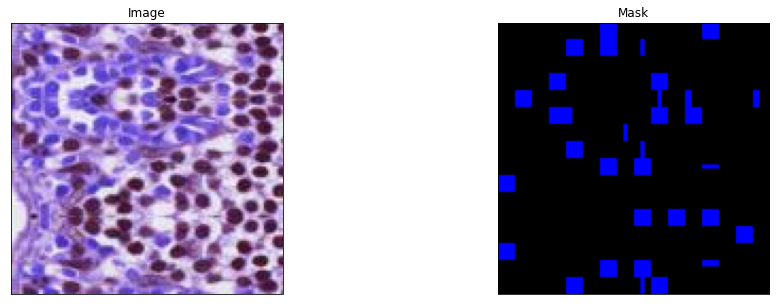

(128, 128, 3) (128, 128, 1)


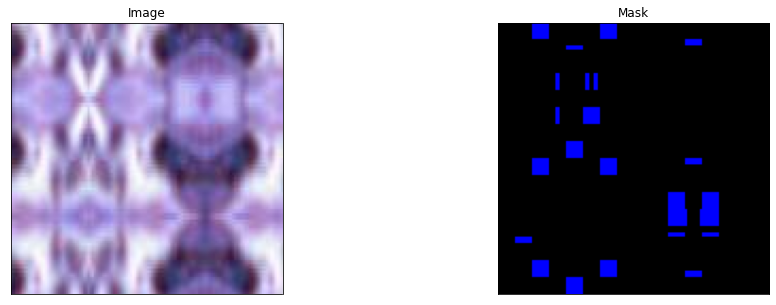

(128, 128, 3) (128, 128, 1)


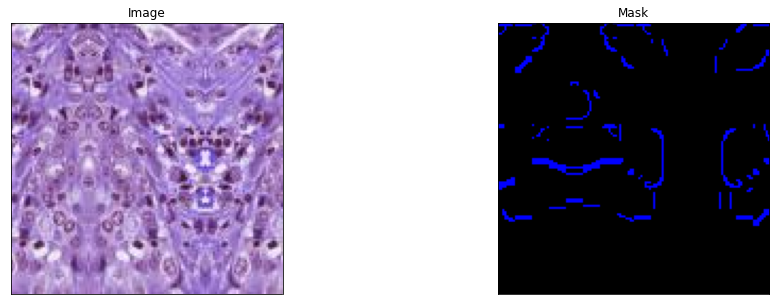

In [38]:
dataset = Dataset(x_train_dir, y_train_dir, classes=med)

for i in range(5):
    
    image, mask = dataset[random.randrange(len(dataset))] # get some sample
    print(image.shape, mask.shape)

    visualize(
        image=image, 
        mask = mask[..., 0].squeeze(),
    )


#### Augmentations

    horizontal flip
    affine transforms
    perspective transforms
    brightness/contrast/colors manipulations
    image bluring and sharpening
    gaussian noise
    random crops

In [39]:
def round_clip_0_1(x, **kwargs):
    return x.round().clip(0, 1)

# define heavy augmentations
def get_training_augmentation(resize_to=(320,640)):
    train_transform = [

        A.Resize(*resize_to),
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=1, border_mode=0),
        A.RandomCrop(height=patchsize, width=patchsize, always_apply=True), # patchsize instead of 320
        A.IAAAdditiveGaussianNoise(p=0.2),
    ]
    return A.Compose(train_transform)


def get_validation_augmentation():
    """Add paddings to make image shape divisible by 96"""
    test_transform = [
        A.PadIfNeeded(patchsize, patchsize)
    ]
    return A.Compose(test_transform)

def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    
    """
    
    _transform = [
        A.Lambda(image=preprocessing_fn),
    ]
    return A.Compose(_transform)

(128, 128, 3) (128, 128, 1)


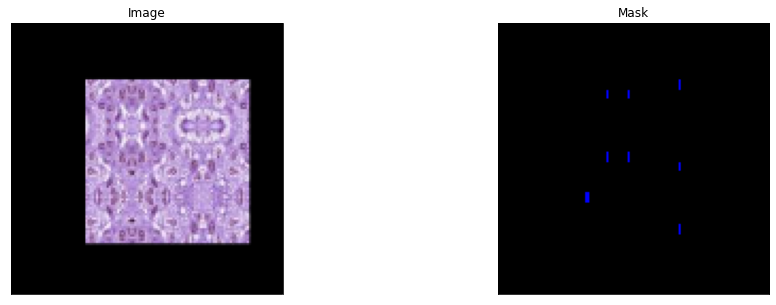

(128, 128, 3) (128, 128, 1)


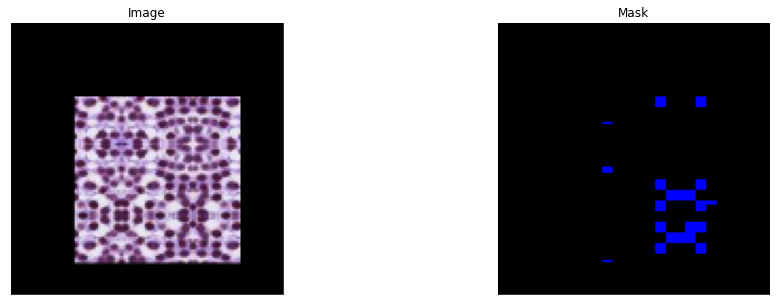

(128, 128, 3) (128, 128, 1)


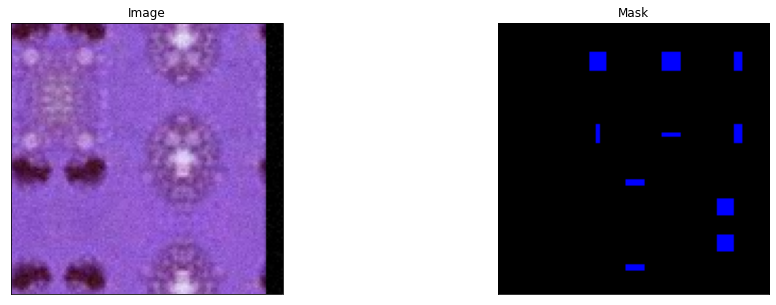

In [40]:
resize_to=(patchsize,patchsize)
dataset = Dataset(x_train_dir, y_train_dir, classes=med, augmentation=get_training_augmentation(resize_to))

for i in range(3):
    image, mask = dataset[random.randrange(len(dataset))] 
    print(image.shape, mask.shape)

    visualize(
        image=image, 
        mask = mask[..., 0].squeeze(),
    )

In [42]:
def Backbone_UNET(input_size, start_neurons, lr, optimizer, loss, metrics, classes, activation):
    
    inputs = Input(input_size)

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = Conv2D(start_neurons, 3, strides=2, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [start_neurons*2, start_neurons*4, start_neurons*8]:
        x = Activation("relu")(x)
        x = Conv2D(filters, 3, padding="same")(x)
        x = BatchNormalization()(x)

        x = Activation("relu")(x)
        x = Conv2D(filters, 3, padding="same")(x)
        x = BatchNormalization()(x)

        x = MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [start_neurons*8, start_neurons*4, start_neurons*2, start_neurons]:
        x = Activation("relu")(x)
        x = Conv2DTranspose(filters, 3, padding="same")(x)
        x = BatchNormalization()(x)

        x = Activation("relu")(x)
        x = Conv2DTranspose(filters, 3, padding="same")(x)
        x = BatchNormalization()(x)

        x = UpSampling2D(2)(x)

        # Project residual
        residual = UpSampling2D(2)(previous_block_activation)
        residual = Conv2D(filters, 1, padding="same")(residual)
        x = add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

#     x = Dropout(0.25)(x)
    # Add a per-pixel classification layer
    output_layer = Conv2D(classes, 1, activation=activation, padding="same")(x)

    model = Model(inputs=inputs, outputs=output_layer)
    model.compile(optimizer, loss, metrics)

    return model

In [ ]:
def Backbone_SEGNET(input_size, start_neurons, lr, optimizer, loss, metrics, classes, activation):

    inputs = Input(input_size)

    ## Encoder
    # Block 1
    x = Conv2D(start_neurons, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(start_neurons, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
#     x = Dropout(0.25)(x)
    
    # Block 2
    x = Conv2D(start_neurons * 2, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(start_neurons * 2, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(start_neurons * 2, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
#     x = Dropout(0.5)(x)

    # Block 3
    x = Conv2D(start_neurons * 4, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(start_neurons * 4, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(start_neurons * 4, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
#     x = Dropout(0.5)(x)


    
    
    ## Decoder
    # Deconv Block 1
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(start_neurons * 2, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(start_neurons * 2, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(start_neurons * 2, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
#     x = Dropout(0.5)(x)
    
    # Deconv Block 2
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(start_neurons, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(start_neurons, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(input_size[0], kernel_size=3, activation='relu', padding='same')(x)
#     x = Dropout(0.25)(x)
    
    # Add a per-pixel classification layer
    output_layer = Conv2D(classes, 1, activation=activation, padding="same")(x)

    model = Model(inputs=inputs, outputs=output_layer)
    model.compile(optimizer, loss, metrics)

    return model

In [ ]:
def dice_coef(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
 
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


### Build and compile network

In [43]:
if option_CTT==1:
    CLASSES = ['Epithelial'] 
if option_CTT==2:
    CLASSES = ['Lymphocyte'] 
if option_CTT==3:
    CLASSES = ['Macrophage'] 
elif option_CTT==4:
    CLASSES = ['Neutrophil'] 
elif option_CTT==5:
    CLASSES = ['Epithelial', 'Lymphocyte', 'Neutrophil', 'Macrophage'] 
    
print(CLASSES)

# Create model
model = None

['Macrophage']


In [ ]:
print('\n\nSelect Segmentation Model')
option_Model = int(input("\n 1-U-Net \n 2-Seg-Net \n"))
while option_Model  not in (1,2):
    option_Model = int(input("\n 1-U-Net \n 2-Seg-Net \n"))

In [50]:
K.clear_session()
import gc
gc.collect()

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.95,allow_growth = True)
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=False,gpu_options=gpu_options))
K.set_session(sess)


i_L = 0

# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

print("\n\n\nExperiment No: ", i_L)

# aliases
dice_loss = sm.losses.DiceLoss()
jaccard_loss = sm.losses.JaccardLoss()

binary_focal_loss = sm.losses.BinaryFocalLoss()
binary_crossentropy = sm.losses.BinaryCELoss()

# loss combinations
bce_dice_loss = binary_crossentropy + dice_loss
bce_jaccard_loss = binary_crossentropy + jaccard_loss

binary_focal_dice_loss = binary_focal_loss + dice_loss
binary_focal_jaccard_loss = binary_focal_loss + jaccard_loss

loss = bce_jaccard_loss + dice_loss

if option_Org==1:
    if option_CTT==1:
        loss_name = "Breast_E"

    elif option_CTT==2:
        loss_name = "Breast_L"

    elif option_CTT==3:
        loss_name = "Breast_M"

    elif option_CTT==4:
        loss_name = "Breast_N"


elif option_Org==2:
    if option_CTT==1:
        loss_name = "Kidney_E"
        
    elif option_CTT==2:
        loss_name = "Kidney_L"

    elif option_CTT==3:
        loss_name = "Kidney_M"

    elif option_CTT==4:
        loss_name = "Kidney_N"


elif option_Org==3:

    if option_CTT==1:
        loss_name = "Lung_E"

    elif option_CTT==2:
        loss_name = "Lung_L"

    elif option_CTT==3:
        loss_name = "Lung_M"

    elif option_CTT==4:
        loss_name = "Lung_N"


elif option_Org==4:

    if option_CTT==1:
        loss_name = "Prostate_E"

    elif option_CTT==2:
        loss_name = "Prostate_L"

    elif option_CTT==3:
        loss_name = "Prostate_M"

    elif option_CTT==4:
        loss_name = "Prostate_N"


elif option_Org==5:

    if option_CTT==1:
        loss_name = "All_E"

    elif option_CTT==2:
        loss_name = "All_L"

    elif option_CTT==3:
        loss_name = "All_M"

    elif option_CTT==4:
        loss_name = "All_N"

metrics = [sm.metrics.IOUScore(threshold=0.50), sm.metrics.FScore(threshold=0.50), dice_coef, precision_m, recall_m]


# Define segmentation model parameters
n_classes = 1 if len(CLASSES) == 1 else (len(CLASSES) + 1)  # case for binary and multiclass segmentation
print("\nClasses: ", n_classes)
activation = 'sigmoid' if n_classes == 1 else 'softmax'
print("Activation: ", activation)


input_size=(patchsize, patchsize, 3)
EPOCHS = 10
LR = 1e-6 
min_LR = 1e-5

# Define optomizer
optimizer = keras.optimizers.Adam(LR)
# optimizer = keras.optimizers.RMSprop(LR)

if option_CTT==1 or option_CTT==2:
    start_neurons = 16

elif option_CTT==3 or option_CTT==4:
    start_neurons = 32

if option_CTT==1 or option_CTT==2 or option_CTT==3 or option_CTT==4:
    BATCH_SIZE = len(os.listdir(x_train_dir))
    BATCH_SIZE_TEST = len(os.listdir(x_test_dir))
    
    
# ==================================================================================

if option_Model==1:
    model_name = "Model_0_6"
    model = Backbone_UNET(input_size, start_neurons, LR, optimizer, loss, metrics, n_classes, activation)
    
elif option_Model==2:
    model_name = "Model_0_5"
    model = Backbone_SEGNET(input_size, start_neurons, LR, optimizer, loss, metrics, n_classes, activation)

print("\nModel: ", model_name)

# ==================================================================================


# Dataset for train images
train_dataset = Dataset(
    x_train_dir, 
    y_train_dir, 
    classes=CLASSES,
#     augmentation=get_training_augmentation(),
#     preprocessing=get_preprocessing(preprocess_input),
)

# Dataset for validation images
test_dataset = Dataset(
    x_test_dir, 
    y_test_dir, 
    classes=CLASSES,
#     augmentation=get_validation_augmentation(),
#     preprocessing=get_preprocessing(preprocess_input),
)

train_dataloader = Dataloder(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = Dataloder(test_dataset, batch_size=BATCH_SIZE_TEST, shuffle=True)

# Check shapes for errors
assert train_dataloader[0][0].shape == (BATCH_SIZE, patchsize, patchsize, 3)
assert train_dataloader[0][1].shape == (BATCH_SIZE, patchsize, patchsize, n_classes)

# Check shapes for errors
assert test_dataloader[0][0].shape == (BATCH_SIZE_TEST, patchsize, patchsize, 3)
assert test_dataloader[0][1].shape == (BATCH_SIZE_TEST, patchsize, patchsize, n_classes)

experiment_name = str(Feature_Type) + "_PatchSize-" + str(patchsize) + "_Loss-" + str(loss_name) + "_BatchSize-" + str(BATCH_SIZE) + "_NuceliType-" + str(Name_Nuclei)
log_path = os.path.join(work_directory_R_S_T, "logs", experiment_name)
print("\nDataset Log Path:", log_path) 

try:
    # Make directory
    create_directory(log_path) 
except OSError:
    print ("\nCreation of the log directory %s failed" % log_path)


# Define callbacks for learning rate scheduling, logging and best checkpoints saving
callbacks = [
    keras.callbacks.ModelCheckpoint('{}/{}.h5'.format(log_path, experiment_name), monitor='val_loss', save_best_only=True, mode='min'),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, verbose=1, patience=5, mode='min'), ## new_lr = lr * factor # 5
    keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, verbose=1, patience=5, mode='min', restore_best_weights=True), # 8
    keras.callbacks.CSVLogger('{}/training.CSV'.format(log_path))
]

# Load train loader
x_train_x , y_train_y = next(iter(train_dataloader))
print(x_train_x.shape, y_train_y.shape)

# Test valid loader
x_test_x , y_test_y  = next(iter(test_dataloader))
print(x_test_x.shape, y_test_y.shape)


model_history = []  
cv_scores = []  
cv_scores_1 = []  
cv_scores_2 = []  
cv_scores_3 = []  
cv_scores_4 = []  

kfold_splits = 10

# skf = StratifiedKFold(n_splits=kfold_splits, shuffle=True)
skf = KFold(n_splits=kfold_splits, shuffle=True)
# skf = KFold(n_splits=kfold_splits, shuffle=False)

path_Saved = os.path.join(work_directory_R_S_T, "logs", experiment_name) 
filepath =  path_Saved + ".h5"
print("\nDataset File Log Path:", filepath) 

image_depth = 3
X_KF = x_train_x.reshape(x_train_x.shape[0], patchsize*patchsize*image_depth)
Y_KF = y_train_y.reshape(y_train_y.shape[0], patchsize*patchsize*n_classes)
 
# Train model
start_time = time.time()

if not (os.path.exists(filepath)):

    print('Training Starts...')      
    print('X_train shape:', X_KF.shape)
    print('Y_train shape:', Y_KF.shape)                                                                                                                                                                      

    for index, (train_indices, val_indices) in enumerate(skf.split(X_KF, Y_KF)):
        
        print("\n\n\tTraining on fold " + str(index+1) + "/" + str(kfold_splits) + "...")
        xtrain_R, xvalid_R = x_train_x[train_indices], x_train_x[val_indices]
        ytrain_R, yvalid_R = y_train_y[train_indices], y_train_y[val_indices]    

        print('Train data:', xtrain_R.shape,', Train labels:', ytrain_R.shape)
        print('Validation data:', xvalid_R.shape,', Validation labels:', yvalid_R.shape)

        with tf.device('/device:GPU:0'):
            history = model.fit(xtrain_R, ytrain_R, 
                batch_size=2,
                epochs=EPOCHS, 
                callbacks=callbacks, 
                verbose=1,
                validation_data=(xvalid_R, yvalid_R), 
            )

        model_history.append(history)    
        print('\nEvaluating the Model...')
        scores = model.evaluate(xvalid_R, yvalid_R,verbose=0)
        
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cv_scores.append(scores[1] * 100)

        print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
        cv_scores_1.append(scores[2] * 100)

        print("%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))
        cv_scores_2.append(scores[3] * 100)

        print("%s: %.2f%%" % (model.metrics_names[4], scores[4]*100))
        cv_scores_3.append(scores[4] * 100)

        print("%s: %.2f%%" % (model.metrics_names[5], scores[5]*100))
        cv_scores_4.append(scores[5] * 100)
        
        del xtrain_R, xvalid_R, ytrain_R, yvalid_R     

    print("\n%s: %.2f%%" % ("Mean IOU: ",np.mean(cv_scores)))
    print("%s: %.2f%%" % ("Standard Deviation: +/-", np.std(cv_scores)))
    print("%.2f%% (+/- %.2f%%)" % (np.mean(cv_scores), np.std(cv_scores)))
    print('Estimated IOU %.3f (%.3f)' % (np.mean(cv_scores), np.std(cv_scores)))

    print("\n\n%s: %.2f%%" % ("Mean F1-Score: ",np.mean(cv_scores_1)))
    print("%s: %.2f%%" % ("Standard Deviation: +/-", np.std(cv_scores_1)))
    print("%.2f%% (+/- %.2f%%)" % (np.mean(cv_scores_1), np.std(cv_scores_1)))
    print('Estimated F1-Score %.3f (%.3f)' % (np.mean(cv_scores_1), np.std(cv_scores_1)))

    print("\n\n%s: %.2f%%" % ("Mean Dice: ",np.mean(cv_scores_2)))
    print("%s: %.2f%%" % ("Standard Deviation: +/-", np.std(cv_scores_2)))
    print("%.2f%% (+/- %.2f%%)" % (np.mean(cv_scores_2), np.std(cv_scores_2)))
    print('Estimated Dice %.3f (%.3f)' % (np.mean(cv_scores_2), np.std(cv_scores_2)))

    print("\n\n%s: %.2f%%" % ("Mean Precision: ",np.mean(cv_scores_3)))
    print("%s: %.2f%%" % ("Standard Deviation: +/-", np.std(cv_scores_3)))
    print("%.2f%% (+/- %.2f%%)" % (np.mean(cv_scores_3), np.std(cv_scores_3)))
    print('Estimated Precision %.3f (%.3f)' % (np.mean(cv_scores_3), np.std(cv_scores_3)))

    print("\n\n%s: %.2f%%" % ("Mean Recall: ",np.mean(cv_scores_4)))
    print("%s: %.2f%%" % ("Standard Deviation: +/-", np.std(cv_scores_4)))
    print("%.2f%% (+/- %.2f%%)" % (np.mean(cv_scores_4), np.std(cv_scores_4)))
    print('Estimated Recall %.3f (%.3f)' % (np.mean(cv_scores_4), np.std(cv_scores_4)))
    
else:
# load the models
    print('\nLoading Saved Models')
    print('Model : ',filepath)
    model = load_model(filepath)
    
end_time_ = time.time()

print("--- Time taken to train : %s hours ---" % ((end_time_ - start_time)//3600))
print("\n\n")            

# Test model
start_time_2 = time.time()

print("\n")
scores = model.evaluate(x_test_x , y_test_y, verbose=1)

with open(work_directory_R_S_T + "/MetricsResult_" + str(Feature_Type) + "_" + str(Name_Nuclei) + ".txt", "a") as myfile:
    myfile.write("\n\n\n============================ Dataset ================================ ")
    myfile.write("\n Configuration:")                    
    myfile.write("\n Nuclei Type = " + str(Name_Nuclei))                    
    myfile.write("\n Feature Type = " + str(Feature_Type))                    
#     myfile.write("\n Classifier = " + str(Name_Model))                    
    myfile.write("\n PatchSize = " + str(patchsize))                    
    myfile.write("\n BatchSize = " + str(BATCH_SIZE))                    
    myfile.write("\n Loss Name = " + str(loss_name))                    


mean_scores = []

### ### ### Print Scores ### ### ###
print("Loss: {:.5}".format(scores[0]))
mean_scores.append(scores[0])

with open(work_directory_R_S_T + "/MetricsResult_" + str(Feature_Type) + "_" + str(Name_Nuclei) + ".txt", "a") as myfile:
    myfile.write("\n Loss Score: " + str(scores[0]))                    

for metric, value in zip(metrics, scores[1:]):
    print("Mean {}: {:.5}".format(metric.__name__, value))
    mean_scores.append(value)

    with open(work_directory_R_S_T + "/MetricsResult_" + str(Feature_Type) + "_" + str(Name_Nuclei) + ".txt", "a") as myfile:
        myfile.write("\n Mean {}: {:.5}".format(metric.__name__, value))
        

#     n = 5
#     ids = np.random.choice(np.arange(len(test_dataset)), size=n)

#     for i in ids:

#         image, gt_mask = test_dataset[i]
#         image = np.expand_dims(image, axis=0)
#         pr_mask = model.predict(image)

# #         print(image.shape, gt_mask.shape, pr_mask.shape)

#         gt_mask = np.argmax(gt_mask.squeeze(), axis=-1)
#         pr_mask = np.argmax(pr_mask.squeeze(), axis=-1)
#         print("Uniques in label and predicted", np.unique(gt_mask), np.unique(pr_mask))

#         visualize(
#             image=denormalize(image.squeeze()),
# #             image= image.squeeze(),
#             gt_mask = gt_mask,
#             pr_mask = pr_mask
# #             gt_mask = gt_mask[..., 0].squeeze(),
# #             pr_mask = pr_mask[..., 0].squeeze(),
#         )


end_time_2 = time.time()

print("--- Time taken to test : %s hours ---" % ((end_time_2 - start_time_2)//3600))
print("\n\n")
del model










Experiment No:  0

Classes:  1
Activation:  sigmoid











Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Model:  Model_0_5

Dataset Log Path: D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics_Model_0/logs\Classify_E_All_PatchSize-128_Loss-All_M_BatchSize-1078_NuceliType-Macrophage
(1078, 128, 128, 3) (1078, 128, 128, 1)
(270, 128, 128, 3) (270, 128, 128, 1)

Dataset File Log Path: D:\Research Work\Paper - 4\BreastLiverNet\MoNuSAC\My_Code 19-05-2022 Professor Idea\Final Code\Decemeber_22/January_WRadiomics_Model_0/logs\Classify_E_All_PatchSize-128_Loss-All_M_BatchSize-1078_NuceliType-Macrophage.h5
Training Starts...
X_train shape: (1078, 49152)
Y_train shape: (1078, 16384)


	Training on fold 1/10...
Train data: (970, 128, 128, 3) , Train labels: (970, 128, 128, 1)
Validation data: (108, 128, 128, 3) , Validation labels: (108, 128, 128, 1)


Train on 97

970/970 [==============================] - 18s 18ms/step - loss: 1.9815 - iou_score: 0.1356 - f1-score: 0.2214 - dice_coef: 0.1570 - precision_m: 0.3834 - recall_m: 0.1716 - val_loss: 1.9810 - val_iou_score: 0.1099 - val_f1-score: 0.1796 - val_dice_coef: 0.1576 - val_precision_m: 0.3096 - val_recall_m: 0.1622
Epoch 6/6
970/970 [==============================] - 17s 17ms/step - loss: 1.9194 - iou_score: 0.1731 - f1-score: 0.2743 - dice_coef: 0.1872 - precision_m: 0.4067 - recall_m: 0.2272 - val_loss: 1.9444 - val_iou_score: 0.1288 - val_f1-score: 0.2052 - val_dice_coef: 0.1731 - val_precision_m: 0.3591 - val_recall_m: 0.1807

Evaluating the Model...
iou_score: 15.98%
f1-score: 27.54%
dice_coef: 19.67%
precision_m: 36.28%
recall_m: 22.34%


	Training on fold 3/10...
Train data: (970, 128, 128, 3) , Train labels: (970, 128, 128, 1)
Validation data: (108, 128, 128, 3) , Validation labels: (108, 128, 128, 1)
Train on 970 samples, validate on 108 samples
Epoch 1/6
970/970 [==================

971/971 [==============================] - 17s 17ms/step - loss: 0.8910 - iou_score: 0.5912 - f1-score: 0.7161 - dice_coef: 0.6851 - precision_m: 0.8004 - recall_m: 0.6579 - val_loss: 1.4616 - val_iou_score: 0.3318 - val_f1-score: 0.4550 - val_dice_coef: 0.4447 - val_precision_m: 0.6822 - val_recall_m: 0.3736

Evaluating the Model...
iou_score: 33.90%
f1-score: 50.58%
dice_coef: 49.33%
precision_m: 75.19%
recall_m: 38.38%


	Training on fold 10/10...
Train data: (971, 128, 128, 3) , Train labels: (971, 128, 128, 1)
Validation data: (107, 128, 128, 3) , Validation labels: (107, 128, 128, 1)
Train on 971 samples, validate on 107 samples
Epoch 1/6
971/971 [==============================] - 17s 18ms/step - loss: 0.8913 - iou_score: 0.5905 - f1-score: 0.7144 - dice_coef: 0.6844 - precision_m: 0.7995 - recall_m: 0.6554 - val_loss: 1.3302 - val_iou_score: 0.3894 - val_f1-score: 0.5179 - val_dice_coef: 0.5003 - val_precision_m: 0.6662 - val_recall_m: 0.4612
Epoch 2/6
971/971 [=================

In [54]:
print("\n--- Done Segmentation Model Training\n")




--- Done 



